In [48]:
import matplotlib.pyplot as plt
import numpy as np

Läs in filen unlabelled_data och separera datapunkterna till x och y värden

In [49]:
path = r"C:\Users\vilma\python-programming-VILMA-LINDROTH\Labs\Lab3\unlabelled_data.csv"

with open(path, "r") as file:
    Data = []
    for line in file:
        DataParts = line.strip().split(",")
        if len(DataParts) == 2:
            X = float(DataParts[0])
            Y = float(DataParts[1])
            Data.append((X, Y))

En rak linje som separerar datapunkterna

In [50]:
x_line = np.linspace(-5, 5)
k = -5/3
m = 0.25        
y_line = k*x_line + m

Räta Linjens ekvation som kommer användas för att plotta klassificeringslinjerna

In [51]:
def RakaLinjer(k, m):    
    x = np.linspace(-5, 5)       
    y = k*x + m

    return x, y

Funktion för att tilldela datapunkterna labeln under eller över klassificeringslinjen

In [52]:
def LabelledData(Data, k, m):

    Labelled_Data = []

    for X, Y in Data:
        y_at_X = k*X + m
        if Y <= y_at_X:
            Label = 0
        else:
            Label = 1
        Labelled_Data.append((X, Y, Label))
    return Labelled_Data


Klassificerar datapunkterna för plotting

In [53]:
def KlassPlotting(Labelled_Data):
    X_Below_Line = []
    Y_Below_Line = []
    X_Above_Line = []
    Y_Above_Line = []

    for X, Y, Label in Labelled_Data:
        if Label == 0:
            X_Below_Line.append(X)
            Y_Below_Line.append(Y)
        elif Label == 1:
            X_Above_Line.append(X)
            Y_Above_Line.append(Y)
    return X_Below_Line, Y_Below_Line, X_Above_Line, Y_Above_Line



Skapar lista av flera klassificeringslinjer

In [54]:

Lines = [((-5/3), 0.25, "y(x)", "purple"),
         (-0.489, 0, "f(x)", "red"),
         (-2, 0.16, "g(x)", "orange"),
         (800, -120, "h(x)", "magenta")
         ]

Plottar datapunkterna och klacificeringslinjerna i subplots

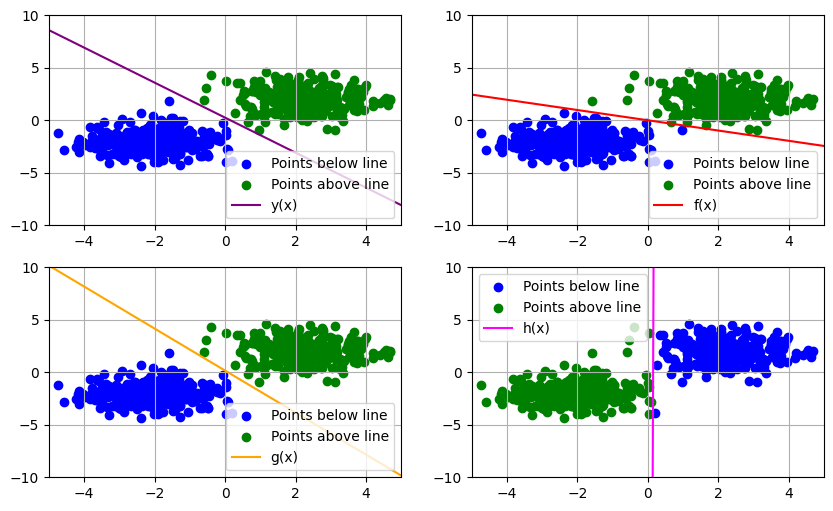

In [55]:
plt.subplots(2, 2, figsize=(10, 6))
for i, (k, m, name, color) in enumerate(Lines, start=1):
    
    x_below, y_below, x_above, y_above = KlassPlotting(LabelledData(Data, k, m))
    x, y = RakaLinjer(k, m)
    
    plt.subplot(2, 2, i)
    plt.scatter(x_below, y_below, color = "blue", label = "Points below line")
    plt.scatter(x_above, y_above, color = "green", label = "Points above line")
    plt.plot(x, y, color = color, label = name)
    plt.xlim(-5, 5)
    plt.ylim(-10, 10)
    plt.grid()
    plt.legend()
plt.show()

Då vi inte vet vad datapunkterna representerar kan vi inte säga om denna klassificeringsmetod är användbar. Man kan anta, då datapunkterna är väldigt tätt fördelade, att en linjär klassificering inte är tillförlitlig. Man kan argumentera att om datapunkterna visuellt låg i "kluster" med stort avstånd mellan klustrerna, samt om data hade givna klassificeringar, att denna metod har potentialen för att vara användbar. T.ex om man skulle klasifficera datapunkterna till elefant eller mus baserat på vikt och höjd. Vid ett sådant fall kan man dra en linje och anse den tillförlitlig.
Vid detta fall är variablerna dock tvetydiga och klassificeringsmetoden kan därför inte anses vara tillförlitlig.

Vid jämförande de olika klassificeringslinjerna kan man argumentera att y(x) och g(x) är de linjer som fördelar datapunkterna jämnast utifrån de båda variablernas värden. h(x) fördelar punkterna utfrån x-axeln, med mindre åtanke till y-axeln. Och f(x) fördelar punkterna mer utifrån y-axeln. I detta fall är alla linjerna lika tillförlitliga, då vi inte har vetskap om variablernas representation. Det finns ett oändligt antal linjer som alla hade varit lika tillförlitliga. Men ur ett generaliserande perspektiv kan man utesluta i alla fall h(x), och kanske också f(x).